In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

sns.set_style()

# Exploracion de datos

In [3]:
train_dir = "data/Train.xlsx"

data = pd.read_excel(train_dir)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,240000,2,2,2,37,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
1,240000,2,3,1,43,0,0,0,0,0,...,65130,66494,67441,2300,2400,2329,2411,2050,2000,0
2,40000,2,1,2,24,0,0,0,0,0,...,37263,35224,34111,5000,8017,7000,4000,5000,5000,1
3,360000,1,1,2,29,-2,-2,-2,-2,-2,...,3466,1630,2931,2358,3788,3483,1638,2946,16950,0
4,130000,1,1,2,27,0,0,0,0,0,...,35194,35951,36703,1867,1872,1256,1500,1500,1500,0


In [4]:
data.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [5]:
data = data.rename(columns={"default.payment.next.month":"default", "PAY_0":"PAY_1"})

In [6]:
gr = data.groupby("default")[["LIMIT_BAL"]].count()
gr["pct"] = gr["LIMIT_BAL"]/gr["LIMIT_BAL"].sum()
gr

,LIMIT_BAL,pct
default,,
0,18690,0.778782
1,5309,0.221218


Las clases no estan desbalanceadas

In [7]:
XTrain, XTest, yTrain, yTest = train_test_split(data.drop(columns="default"), data["default"], test_size=0.2, random_state=7)

In [8]:
data_train = pd.concat([XTrain,yTrain],axis=1)
gr = data_train.groupby("default")[["LIMIT_BAL"]].count()
gr["pct"] = gr["LIMIT_BAL"]/gr["LIMIT_BAL"].sum()
gr

,LIMIT_BAL,pct
default,,
0,14978,0.780145
1,4221,0.219855


In [9]:
var_categ = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

var_cont = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

data_train[var_cont].describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,19199.000000,19199.000000,19199.000000,19199.000000,1.919900e+04,19199.000000,19199.000000,19199.000000,19199.000000,1.919900e+04,19199.000000,19199.000000,19199.000000,19199.000000
mean,167264.424189,35.484348,51039.577322,49032.712329,4.697210e+04,43227.804521,40361.107141,39000.315173,5620.931299,5.956795e+03,5219.914110,4914.133184,4849.605917,5114.730923
std,129732.975552,9.197402,73530.921163,71027.002951,6.982228e+04,64343.973659,60694.859580,59465.813171,16639.820942,2.413026e+04,17755.914586,16280.270269,15692.645031,17024.830375
min,10000.000000,21.000000,-154973.000000,-69777.000000,-6.150600e+04,-81334.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3516.000000,2910.000000,2.642000e+03,2311.500000,1721.500000,1239.500000,1000.000000,8.270000e+02,390.000000,300.000000,240.500000,148.000000
50%,140000.000000,34.000000,22291.000000,21127.000000,2.005700e+04,19048.000000,18135.000000,17124.000000,2102.000000,2.011000e+03,1781.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.500000,66972.500000,64244.000000,6.034900e+04,54446.500000,50481.000000,49563.000000,5000.000000,5.000000e+03,4497.500000,4007.000000,4030.000000,4000.000000
max,800000.000000,79.000000,746814.000000,743970.000000,1.664089e+06,706864.000000,823540.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,426529.000000,443001.000000


#### Graficas descriptivas

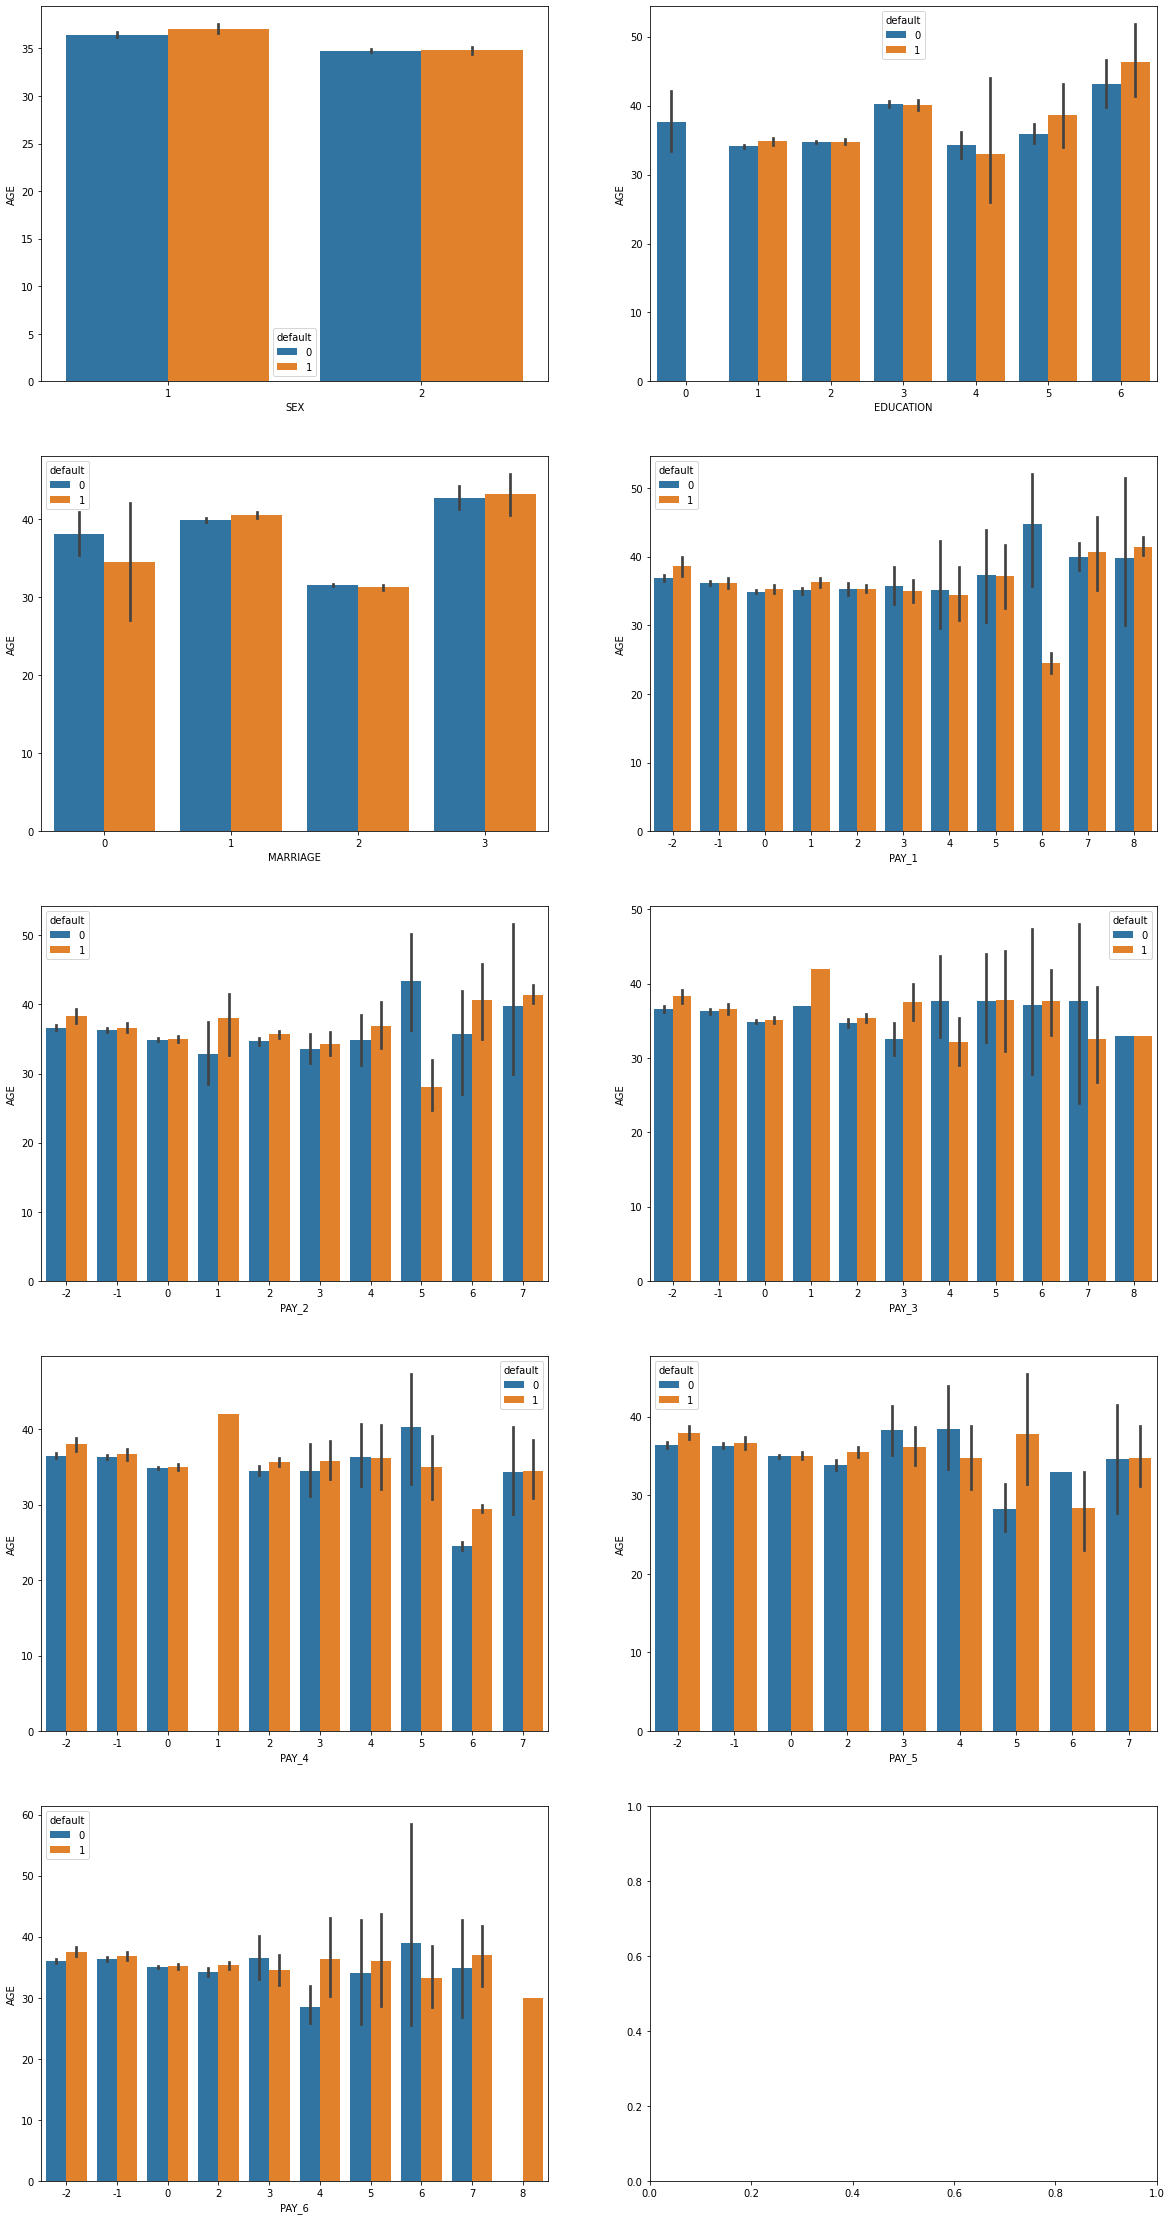

In [10]:
# Grafico 

ncols = 2 
nrows = int(np.ceil(len(data_train[var_categ].columns.values)/ncols))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 40))
axs = ax.flatten()

for i,c in enumerate(var_categ):

    sns.barplot(data=data_train, x=c, y="AGE", hue="default", ax = axs[i])
    #axs[i].set_title("grafica variable: {}".format(c))

Categorias que no estan documentadas, hay que determinar que hacer con dichos casos

In [11]:
data_train[var_cont].describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,19199.000000,19199.000000,19199.000000,19199.000000,1.919900e+04,19199.000000,19199.000000,19199.000000,19199.000000,1.919900e+04,19199.000000,19199.000000,19199.000000,19199.000000
mean,167264.424189,35.484348,51039.577322,49032.712329,4.697210e+04,43227.804521,40361.107141,39000.315173,5620.931299,5.956795e+03,5219.914110,4914.133184,4849.605917,5114.730923
std,129732.975552,9.197402,73530.921163,71027.002951,6.982228e+04,64343.973659,60694.859580,59465.813171,16639.820942,2.413026e+04,17755.914586,16280.270269,15692.645031,17024.830375
min,10000.000000,21.000000,-154973.000000,-69777.000000,-6.150600e+04,-81334.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3516.000000,2910.000000,2.642000e+03,2311.500000,1721.500000,1239.500000,1000.000000,8.270000e+02,390.000000,300.000000,240.500000,148.000000
50%,140000.000000,34.000000,22291.000000,21127.000000,2.005700e+04,19048.000000,18135.000000,17124.000000,2102.000000,2.011000e+03,1781.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.500000,66972.500000,64244.000000,6.034900e+04,54446.500000,50481.000000,49563.000000,5000.000000,5.000000e+03,4497.500000,4007.000000,4030.000000,4000.000000
max,800000.000000,79.000000,746814.000000,743970.000000,1.664089e+06,706864.000000,823540.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,426529.000000,443001.000000


Cuando la variable BILL_AMT{n} tiene un valor negativo indica que la deuda tiene un saldo a favor, por lo que se puede interpretar que se pago mas de la cuenta.

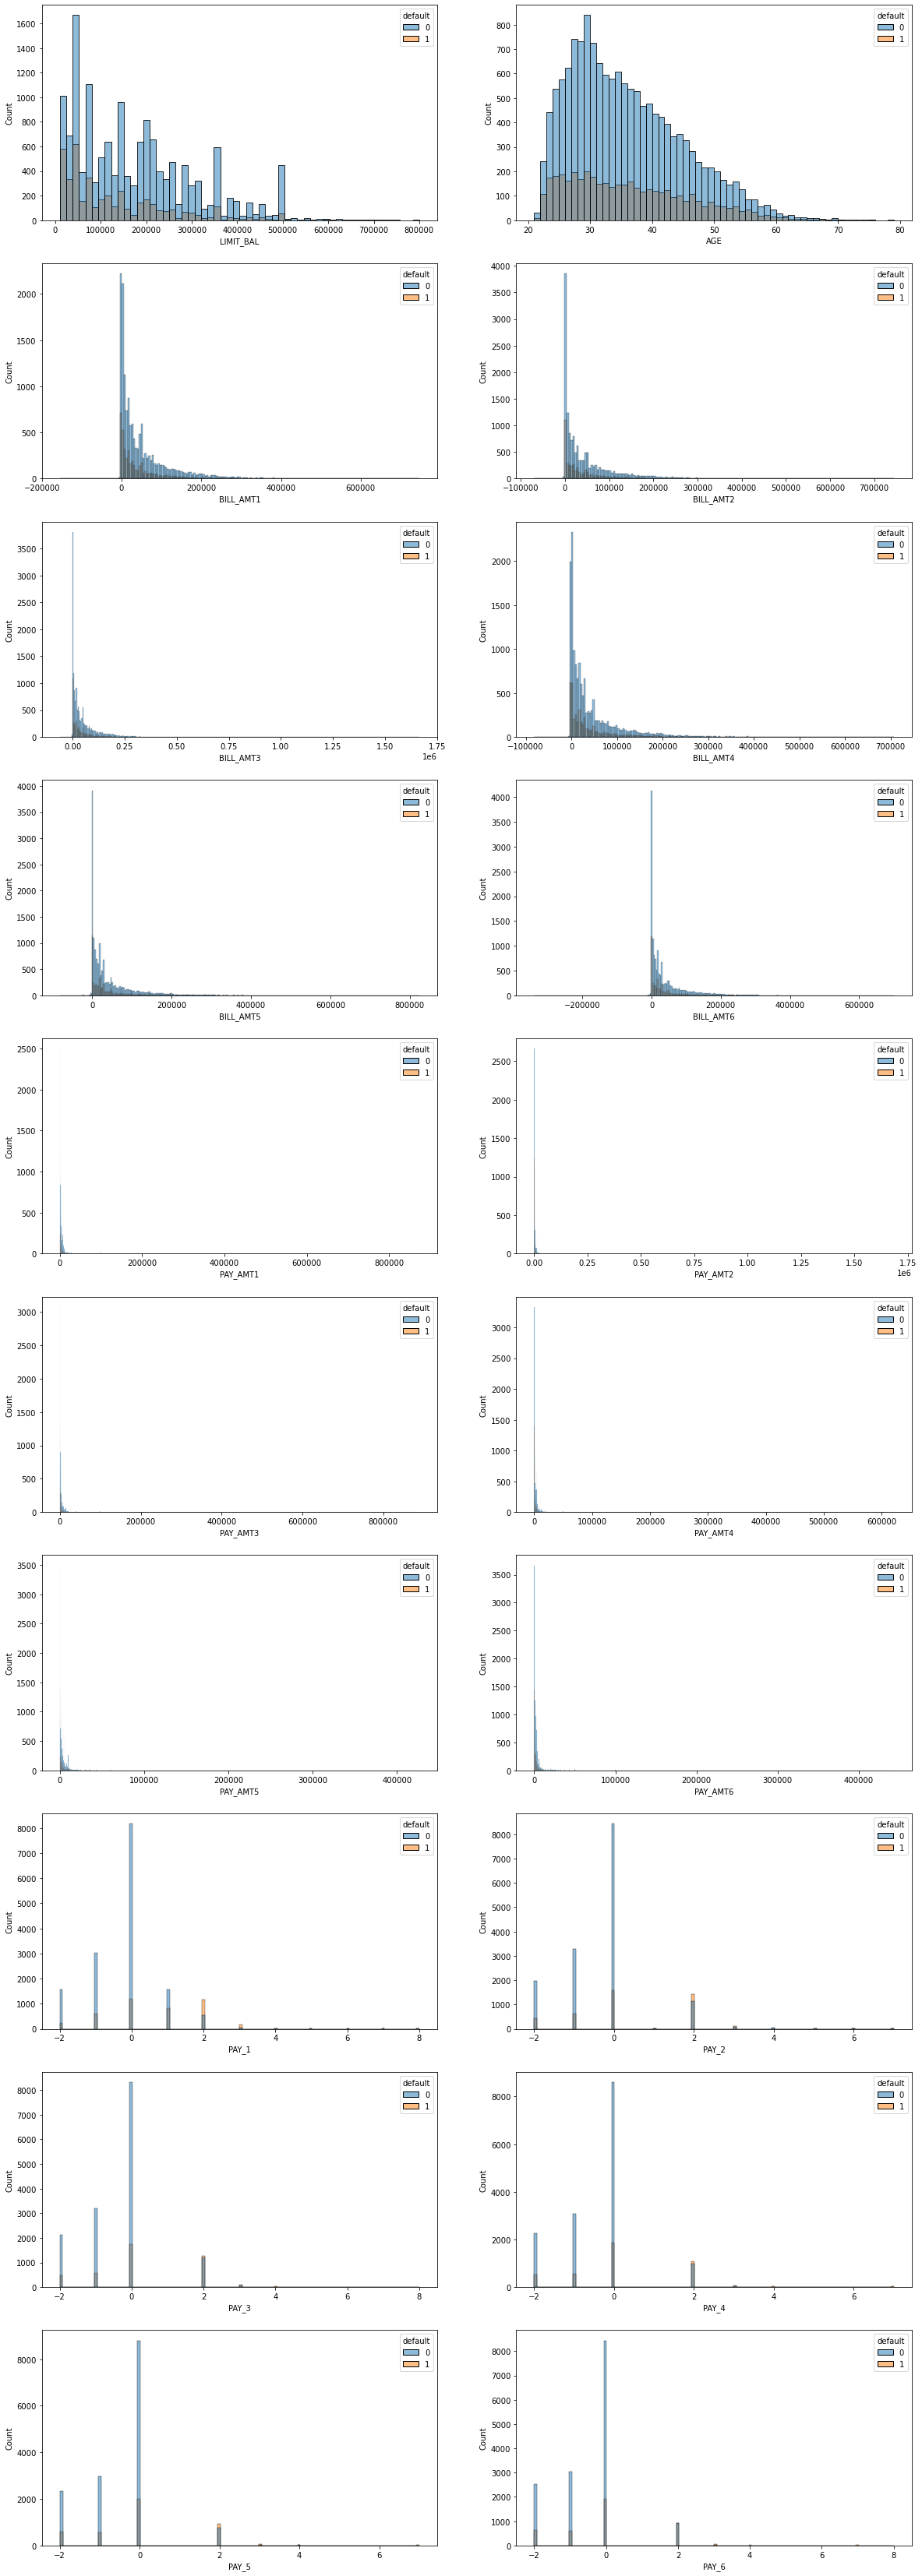

In [12]:
new_var_cont = var_cont + ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

ncols = 2 
nrows = int(np.ceil(len(data_train[new_var_cont].columns.values)/ncols))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 60))
axs = ax.flatten()

for i,c in enumerate(new_var_cont):

    sns.histplot(data=data_train, x=c, hue="default", ax = axs[i])
    #sns.boxplot(data=data_train, y=c, x="default", ax = axs[i])

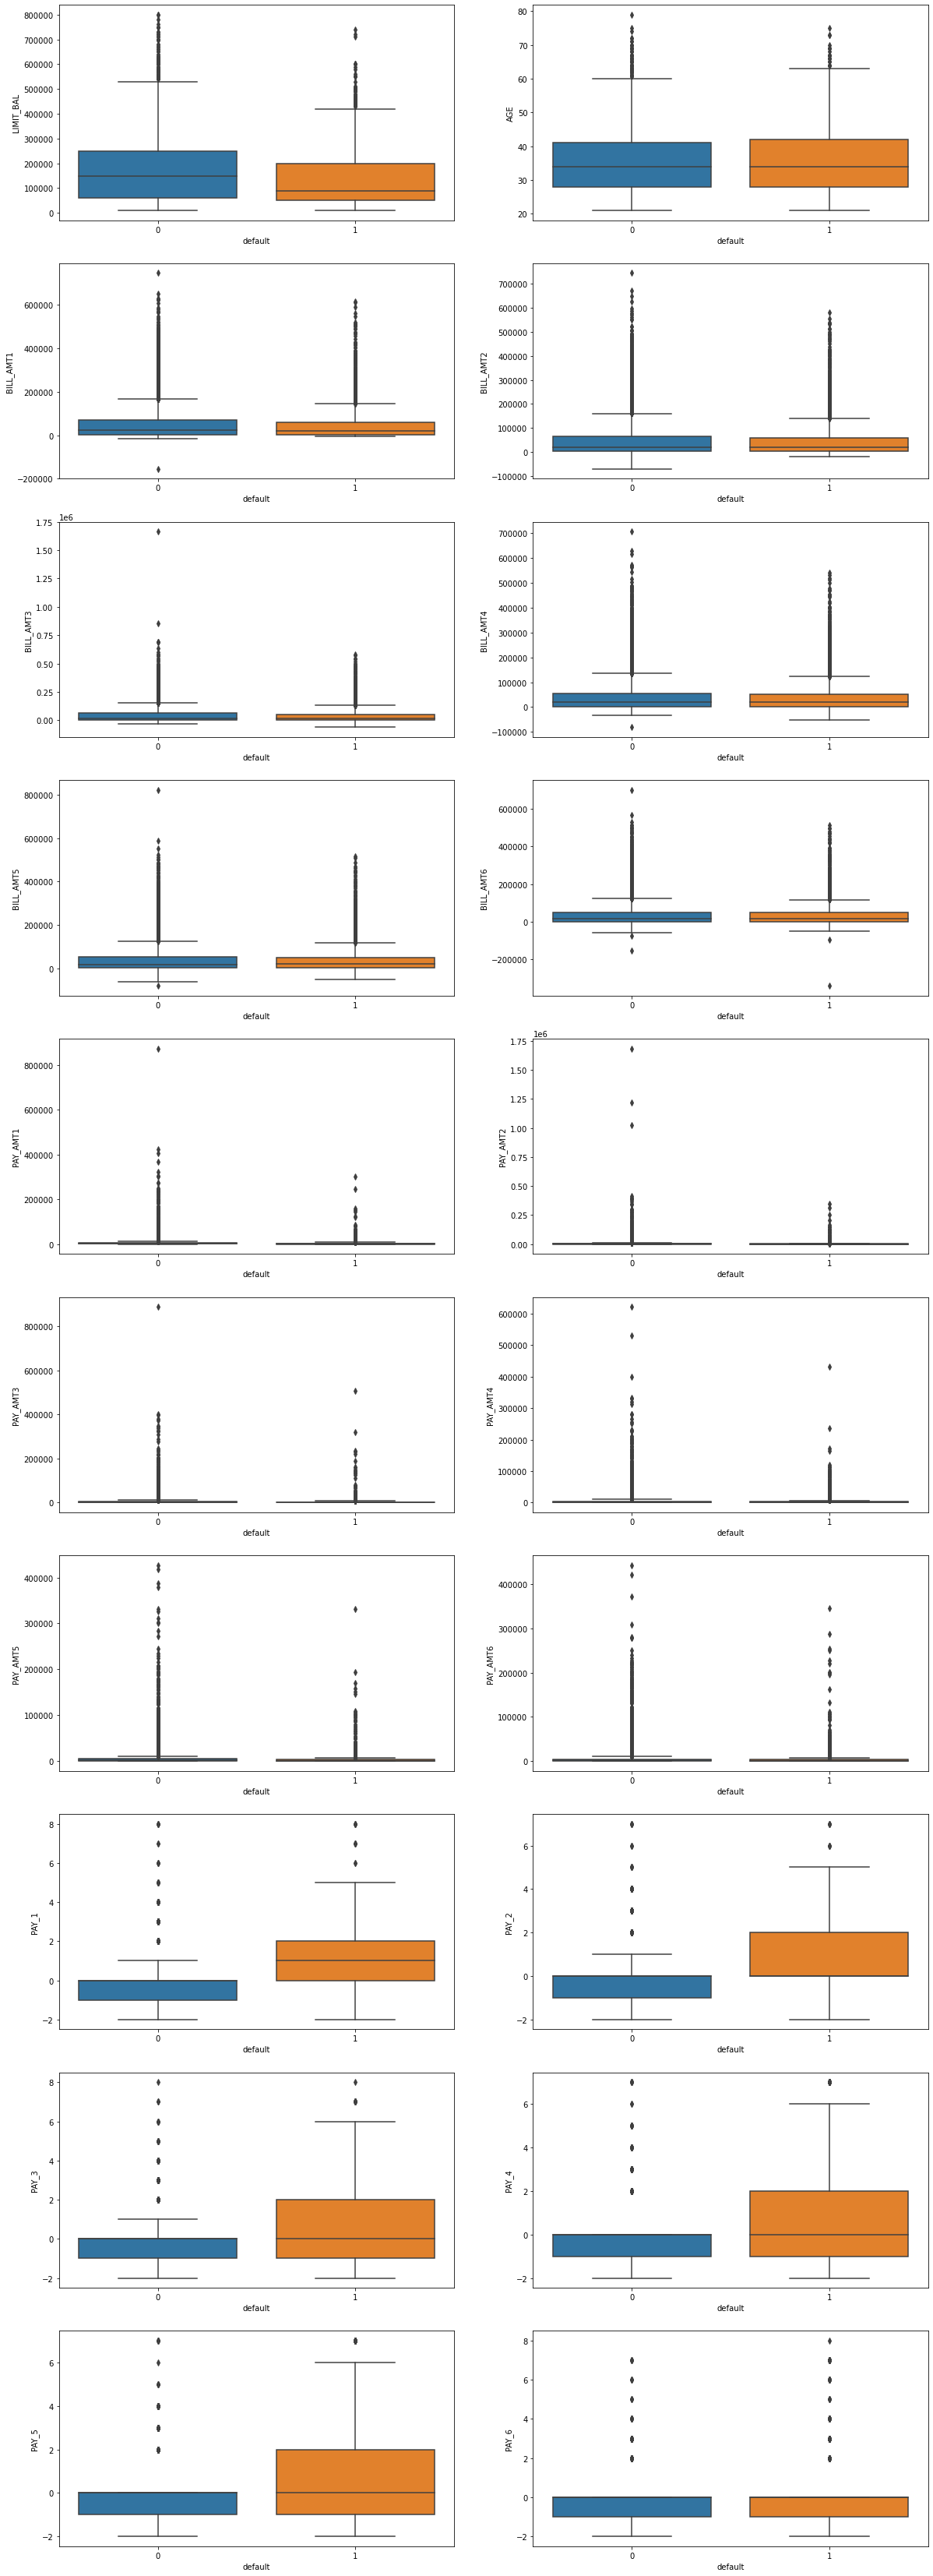

In [13]:
new_var_cont = var_cont + ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

ncols = 2 
nrows = int(np.ceil(len(data_train[new_var_cont].columns.values)/ncols))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 60))
axs = ax.flatten()

for i,c in enumerate(new_var_cont):

    #sns.histplot(data=data_train, x=c, hue="default", ax = axs[i])
    sns.boxplot(data=data_train, y=c, x="default", ax = axs[i])

<AxesSubplot:>

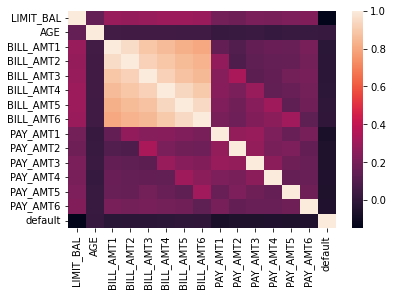

In [14]:
sns.heatmap(data_train[var_cont+["default"]].corr())

Existe alta correlacion entre las variables BILL_AMT{n}, esto puede ser debido a la consistencia en el comportamiento de un cliente por lo que el valor que paga un cliente en un mes quizas sea similar al valor que debe pagar en los meses posteriores o anteriores

# Transformacion de varaibles

Se transformará la variable de BILL_AMT{n} en dos variables una binaria que indica si el valor es negativo (saldo a favor) y otra que tendrá el valor del saldo a favor.

aplicar logaritmo a las variables que tienen skewness

In [15]:
def transform_x(X_in):
    
    for i in np.arange(1,7):
        X_in["IS_REFUND{i}".format(i=i)] = (X_in["BILL_AMT{i}".format(i = i)] < 0).astype(int)
        X_in["REFUND_AMT{i}".format(i=i)] = X_in["BILL_AMT{i}".format(i=i)].apply(lambda x : x*-1 if x < 0 else 0)
        
        
        X_in["POS_BILL_AMT{i}".format(i=i)] = X_in["BILL_AMT{i}".format(i=i)].apply(lambda x : x if x > 0 else 0)
        X_in = X_in.drop(columns="BILL_AMT{i}".format(i=i))

        X_in["DEFAULT_ON_{i}".format(i=i)] = (X_in["PAY_{i}".format(i=i)] > 0).astype(int)


    X_in["PROPORTION_BILL_LIMIT"] = X_in["POS_BILL_AMT1"] / X_in["LIMIT_BAL"]
    X_in["PROPORTION_BILL_PAYED"] = X_in["PAY_AMT1"] / (X_in["POS_BILL_AMT1"]+1)
    
    

    # logaritmo
    X_in["LIMIT_BAL"] = np.log(X_in["LIMIT_BAL"] + 1)
    X_in["AGE"] = np.log(X_in["AGE"] + 1)    
    X_in["PROPORTION_BILL_LIMIT"] = np.log(X_in["PROPORTION_BILL_LIMIT"] + 1)
    X_in["PROPORTION_BILL_PAYED"] = np.log(X_in["PROPORTION_BILL_PAYED"] + 1)

    for i in np.arange(1,7):
        X_in["REFUND_AMT{i}".format(i=i)] = np.log(X_in["REFUND_AMT{i}".format(i=i)] + 1)
        X_in["POS_BILL_AMT{i}".format(i=i)] = np.log(X_in["POS_BILL_AMT{i}".format(i=i)] + 1)
        X_in["PAY_AMT{i}".format(i = i)] = np.log(X_in["PAY_AMT{i}".format(i = i)] + 1)

    # feature engineering

    X_in["CONSECUTIVE_DEFAULTS"] = X_in[["DEFAULT_ON_{i}".format(i=x) for x in np.arange(2,7)]].sum(axis=1)

    X_in["MEAN_BILL_AMT"] = X_in[["POS_BILL_AMT{i}".format(i=x) for x in np.arange(2,7)]].mean(axis=1)
    c = X_in["MEAN_BILL_AMT"] != 0
    X_in["TREND_BILL_AMT"] = 0
    X_in.loc[c,"TREND_BILL_AMT"] = (X_in.loc[c,"POS_BILL_AMT1"]/X_in.loc[c,"MEAN_BILL_AMT"])


    X_in["MEAN_PAY_AMT"] = X_in[["PAY_AMT{i}".format(i=x) for x in np.arange(2,7)]].mean(axis=1)
    c = X_in["MEAN_PAY_AMT"] != 0
    X_in["TREND_PAY_AMT"] = 0
    X_in.loc[c,"TREND_PAY_AMT"] = X_in.loc[c,"PAY_AMT1"]/X_in.loc[c,"MEAN_PAY_AMT"]

    X_in = X_in.drop(columns=["MEAN_BILL_AMT","MEAN_PAY_AMT"])  

    c = X_in["EDUCATION"].isin([0,5,6])
    X_in.loc[c,"EDUCATION"] = 0


    

    # #dummies 
    col_dummies = ['MARRIAGE','EDUCATION','SEX']

    for i in col_dummies:
        X_in = pd.concat([X_in,pd.get_dummies(X_in[i], prefix="{val}_".format(val=i), drop_first=True)], axis=1)
        X_in = X_in.drop(columns=i)

    return X_in

XTrain_transform = transform_x(XTrain)
XTest_transform = transform_x(XTest)


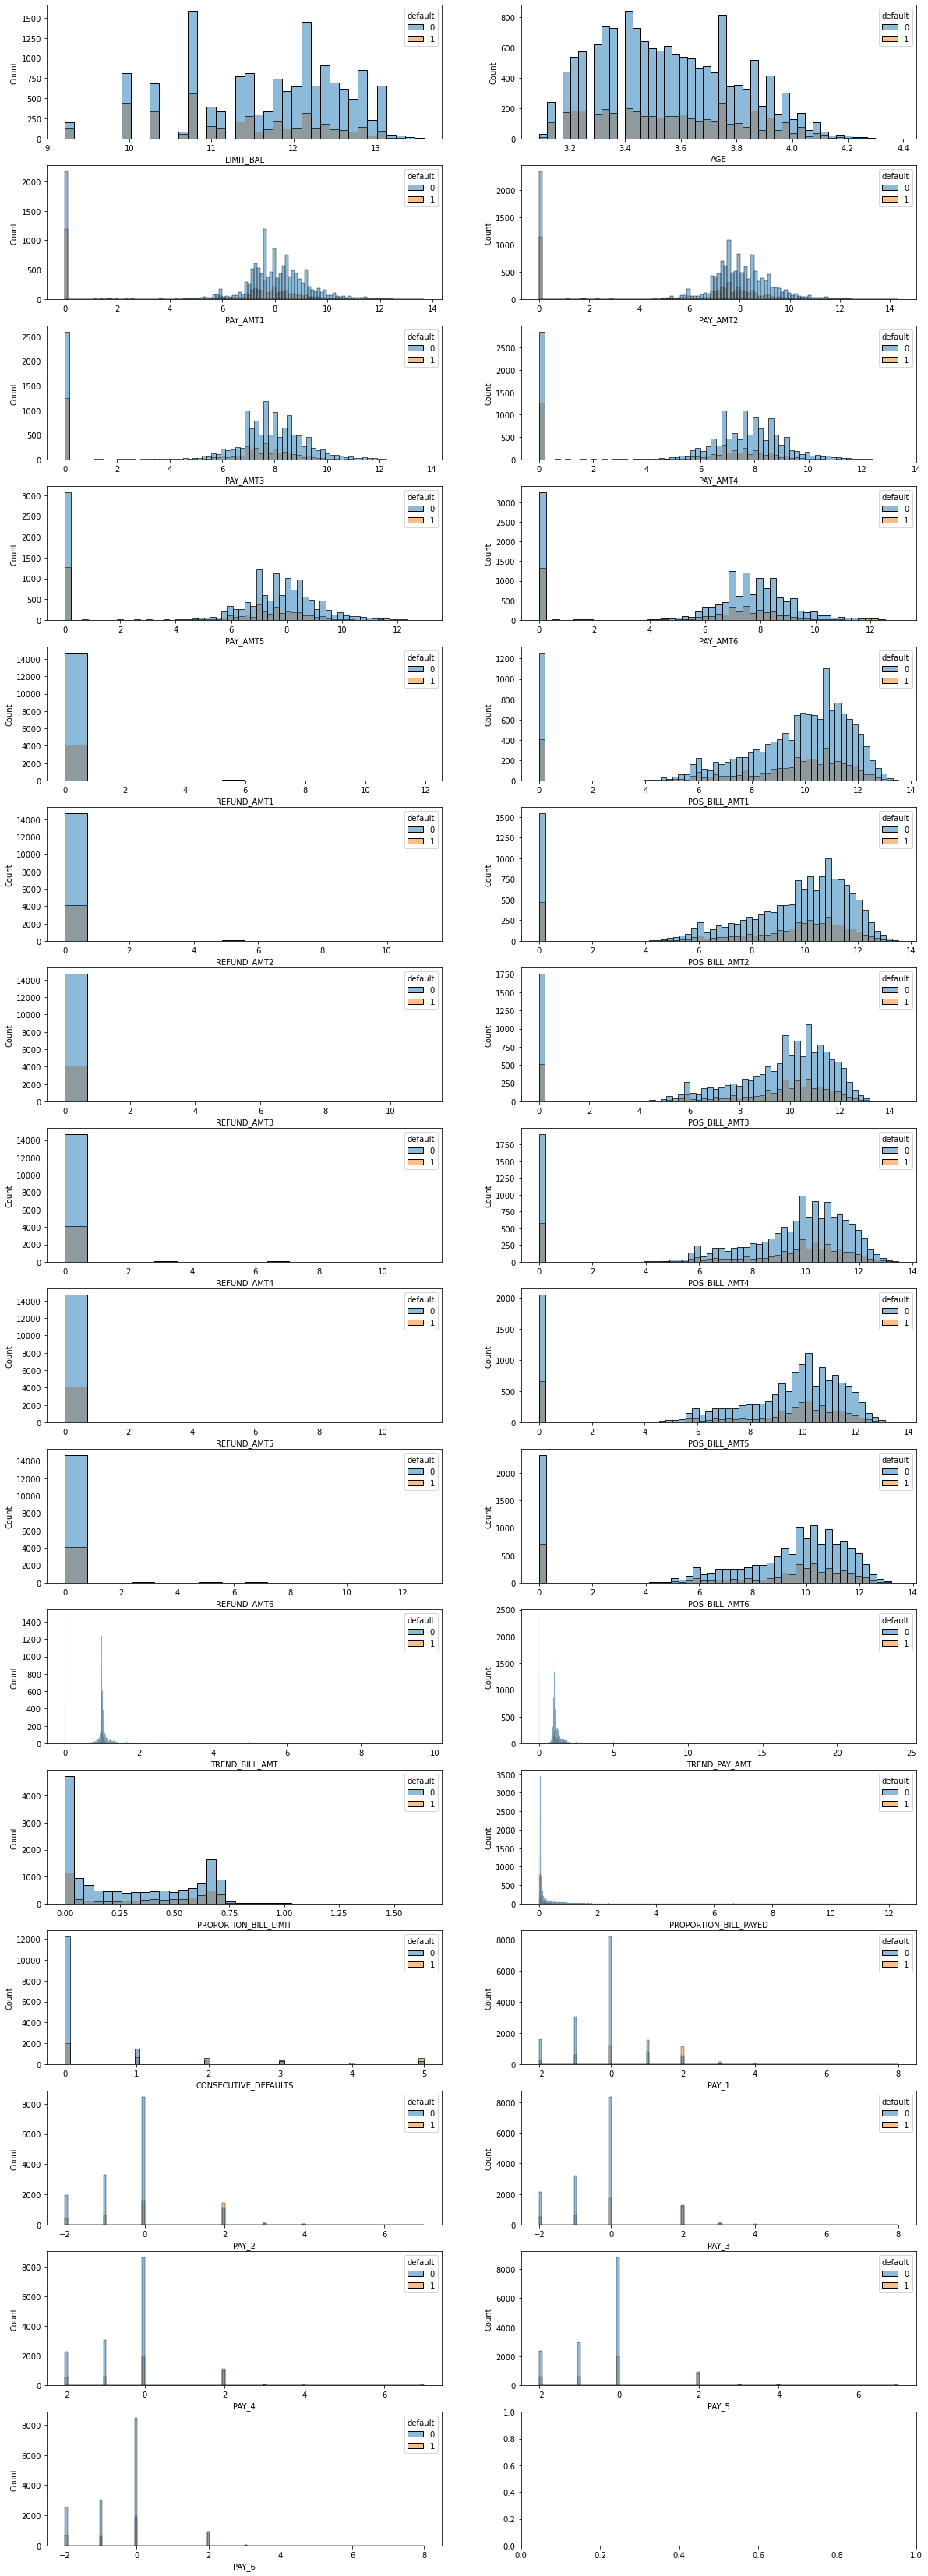

In [16]:
data_train = pd.concat([XTrain_transform,yTrain],axis=1)

var_cont = ['LIMIT_BAL', 'AGE', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
            'REFUND_AMT1','POS_BILL_AMT1','REFUND_AMT2', 'POS_BILL_AMT2',
            'REFUND_AMT3', 'POS_BILL_AMT3', 'REFUND_AMT4', 'POS_BILL_AMT4',
            'REFUND_AMT5', 'POS_BILL_AMT5', 'REFUND_AMT6', 'POS_BILL_AMT6', 'TREND_BILL_AMT', 'TREND_PAY_AMT',
            'PROPORTION_BILL_LIMIT', 'PROPORTION_BILL_PAYED', 'CONSECUTIVE_DEFAULTS']



new_var_cont = var_cont + ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

ncols = 2 
nrows = int(np.ceil(len(data_train[new_var_cont].columns.values)/ncols))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 60))
axs = ax.flatten()

for i,c in enumerate(new_var_cont):

    sns.histplot(data=data_train, x=c, hue="default", ax = axs[i])
    #sns.boxplot(data=data_train, y=c, x="default", ax = axs[i])

<AxesSubplot:>

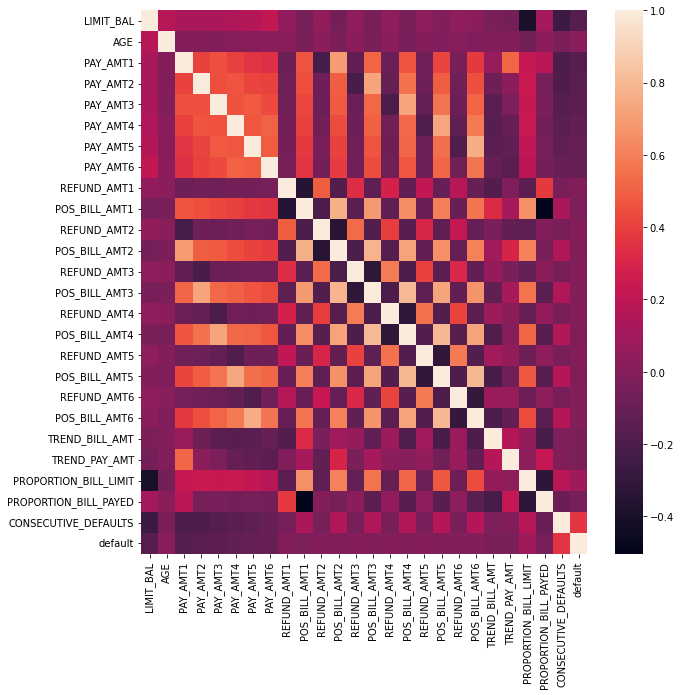

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data_train[var_cont+["default"]].corr(), ax=ax)

In [18]:
# XTrain_back = XTrain_transform.copy()
# XTrain_transform = XTrain_transform.drop(columns=["PAY_AMT{i}".format(i=x) for x in np.arange(2,7)])
# XTrain_transform = XTrain_transform.drop(columns=["PAY_{i}".format(i=x) for x in np.arange(1,7)])


# XTest_back = XTest_transform.copy()
# XTest_transform = XTest_transform.drop(columns=["PAY_AMT{i}".format(i=x) for x in np.arange(2,7)])
# XTest_transform = XTest_transform.drop(columns=["PAY_{i}".format(i=x) for x in np.arange(1,7)])

<AxesSubplot:>

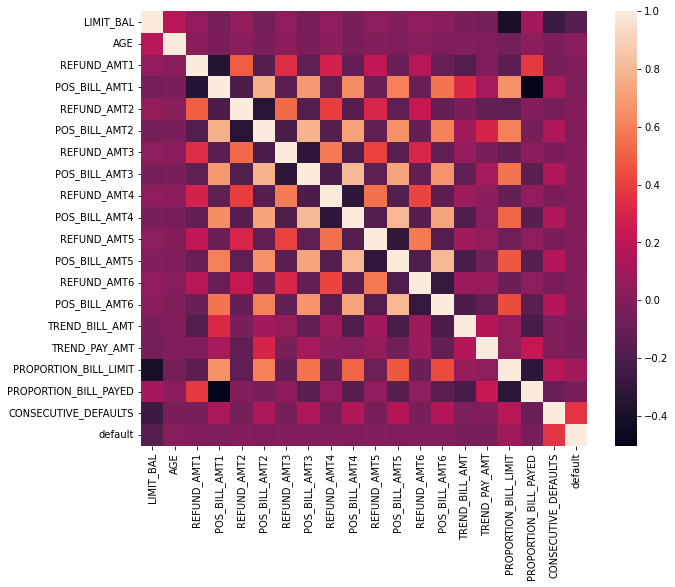

In [19]:
data_train = pd.concat([XTrain_transform,yTrain],axis=1)


var_cont = ['LIMIT_BAL', 'AGE', 'REFUND_AMT1','POS_BILL_AMT1','REFUND_AMT2', 'POS_BILL_AMT2',
            'REFUND_AMT3', 'POS_BILL_AMT3', 'REFUND_AMT4', 'POS_BILL_AMT4',
            'REFUND_AMT5', 'POS_BILL_AMT5', 'REFUND_AMT6', 'POS_BILL_AMT6', 'TREND_BILL_AMT', 'TREND_PAY_AMT',
            'PROPORTION_BILL_LIMIT', 'PROPORTION_BILL_PAYED', 'CONSECUTIVE_DEFAULTS']

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data_train[var_cont+["default"]].corr(), ax=ax)

In [20]:
XTrain_transform.describe()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,...,TREND_BILL_AMT,TREND_PAY_AMT,MARRIAGE__1,MARRIAGE__2,MARRIAGE__3,EDUCATION__1,EDUCATION__2,EDUCATION__3,EDUCATION__4,SEX__2
count,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000,...,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000,19199.00000,19199.000000,19199.000000,19199.000000
mean,11.660909,3.566577,-0.022501,-0.132403,-0.162300,-0.219334,-0.266003,-0.290953,6.625731,6.555657,...,1.086652,1.095117,0.454086,0.533465,0.010886,0.351060,0.46867,0.164488,0.003959,0.605604
std,0.942794,0.244200,1.123722,1.195179,1.197548,1.169226,1.135302,1.153785,3.248797,3.285878,...,0.775046,0.949037,0.497900,0.498892,0.103769,0.477314,0.49903,0.370727,0.062794,0.488733
min,9.210440,3.091042,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,10.819798,3.367296,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6.908755,6.719013,...,0.982400,0.928191,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,11.849405,3.555348,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.651120,7.606885,...,1.005909,1.038592,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
75%,12.388398,3.749435,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.517393,8.517393,...,1.066753,1.261259,1.000000,1.000000,0.000000,1.000000,1.00000,0.000000,0.000000,1.000000
max,13.592368,4.382027,8.000000,7.000000,8.000000,7.000000,7.000000,8.000000,13.680324,14.336837,...,9.699389,24.114146,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [21]:
# XTrain_transform = XTrain_back
# XTest_transform = XTest_back

## Rebalanceo

In [22]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=7, k_neighbors=3)
XTrain_rebalanced, yTrain_rebalanced = sm.fit_resample(XTrain_transform, yTrain)

In [23]:
pd.DataFrame(yTrain_rebalanced).reset_index().groupby("default").count()

,index
default,
0,14978
1,14978


## Seleccion de variables

In [24]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE

### Metodo filtrado

Text(0, 0.5, 'MI scores')

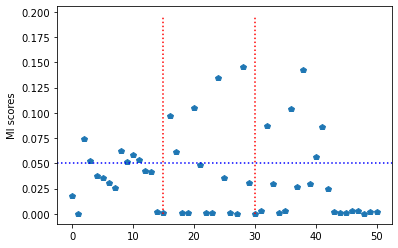

In [25]:
mu_inf=mutual_info_regression(XTrain_transform, yTrain,discrete_features=True,n_neighbors=4)

plt.plot(mu_inf,'p')
plt.vlines(x=[15,30],ymin=0,ymax=np.max(mu_inf)+0.05,ls=':',colors='r')
plt.axhline(y=0.05,ls=':',color='b')  #Threshold
plt.ylabel('MI scores')

In [26]:
select_var_filtrado = XTrain_transform.columns[mu_inf > 0]
select_var_filtrado

XTrain_transform_filtrado = XTrain_transform[select_var_filtrado]
XTest_transform_filtrado = XTest_transform[select_var_filtrado]

### Metodos de envoltura

In [27]:
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(random_state=0,max_depth = 2, n_estimators=200)  #se usa random Forest como el algoritmo predictivo
selector = RFE(estimator, n_features_to_select=15, step=1) #Se define step=1, pero lo puede cambiar para que sea más rápido
selector = selector.fit(XTrain_transform, yTrain) # esto puede tardar algunos minutos

#selector.support_  #Conjunto de variables seleccionadas

select_var_envoltura = XTrain_transform.columns[selector.support_]

XTrain_transform_envoltura = XTrain_transform[select_var_envoltura] 
XTest_transform_envoltura = XTest_transform[select_var_envoltura]

# MODELOS

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn import metrics


from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [29]:
def error_clasificacion(XTrain,yTrain,XTest,yTest,modelo="LDA"):
    modelos = {"LDA":LinearDiscriminantAnalysis(),
                "QDA" : QuadraticDiscriminantAnalysis(),
                "NBC" : GaussianNB(),
                "RegLog": LogisticRegression(random_state=0,max_iter=10000)}
    
    model = modelos[modelo]
    
    
    
    # train - predict de los modelos
    model.fit(XTrain, yTrain)
    predict=model.predict(XTest)
    predict_prob=model.predict_proba(XTest)


    error=0
    for i in range(0,len(yTest)):
        if(yTest.iloc[i]!=predict[i]):
            error+=1/len(yTest)
    print('El error de clasificación para {modelo} en la muestra de test es:{s}'.format(modelo=modelo,s=error))
    
    print(confusion_matrix(y_true=yTest, y_pred=predict))
    accuracy=accuracy_score(y_true=yTest, y_pred=predict)
    print(accuracy)
    precisionRegLog= precision_score(y_true=yTest.values, y_pred=predict)
    print(precisionRegLog)
    
    # curva roc para Train
    fig, ax = plt.subplots(ncols=2, figsize=(16, 8))
    fpr, tpr, thresholds = roc_curve(yTrain, model.predict(XTrain))
    AUC_train=metrics.auc(fpr, tpr)
    ax[0].set_title('Curva ROC para el entrenamiento')
    ax[0].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC_train)
    ax[0].legend(loc = 'lower right')
    ax[0].plot([0, 1], [0, 1],'r--')
    ax[0].axis(xmin=-0.01,xmax=1,ymin=0,ymax=1.05)
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_xlabel('False Positive Rate')

    # curva roc para Test
    fpr, tpr, thresholds = roc_curve(yTest, predict)
    AUC_test=metrics.auc(fpr, tpr)
    ax[1].set_title('Curva ROC para el conjunto de prueba')
    ax[1].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC_test)
    ax[1].legend(loc = 'lower right')
    ax[1].plot([0, 1], [0, 1],'r--')
    ax[1].axis(xmin=-0.01,xmax=1,ymin=0,ymax=1.05)
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_xlabel('False Positive Rate')



    return AUC_train, AUC_test, error, model

In [30]:
def graficas_roc_test_train(Xtrain, yTrain, XTest, yTest, model):

    
    fig, ax = plt.subplots(ncols=2, figsize=(16, 8))

    # Train
    prediccionMdl_Train = model.predict_proba(Xtrain)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(yTrain, prediccionMdl_Train, pos_label=1)
    AUC_train=metrics.auc(fpr, tpr)
    ax[0].set_title('Receiver Operating Characteristic')
    ax[0].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC_train)
    ax[0].legend(loc = 'lower right')
    ax[0].plot([0, 1], [0, 1],'r--')
    ax[0].axis(xmin=-0.01,xmax=1,ymin=0,ymax=1.05)
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_xlabel('False Positive Rate')

    # TEST
    prediccionMdl_Test = model.predict_proba(XTest)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionMdl_Test, pos_label=1)
    AUC_test = metrics.auc(fpr, tpr)
    ax[1].set_title('Receiver Operating Characteristic')
    ax[1].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC_test)
    ax[1].legend(loc = 'lower right')
    ax[1].plot([0, 1], [0, 1],'r--')
    ax[1].axis(xmin=-0.01,xmax=1,ymin=0,ymax=1.05)
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_xlabel('False Positive Rate')

    return AUC_train, AUC_test


def metricas_modelo(XTest, yTest, model):
    
    predict=model.predict(XTest)
    error=0
    for i in range(0,len(yTest)):
        if(yTest.iloc[i]!=predict[i]):
            error+=1/len(yTest)
    print('El error de clasificación para modelo en la muestra de test es:{s}'.format(s=error))
    
    print(confusion_matrix(y_true=yTest, y_pred=predict))
    accuracy = accuracy_score(y_true=yTest, y_pred=predict)
    print("accuracy : {}".format(accuracy))
    precision = precision_score(y_true=yTest.values, y_pred=predict)
    print("precision : {}".format(precision))

    return accuracy, precision

## LDA

El error de clasificación para LDA en la muestra de test es:0.19645833333333618
[[3464  248]
 [ 695  393]]
0.8035416666666667
0.6131045241809673


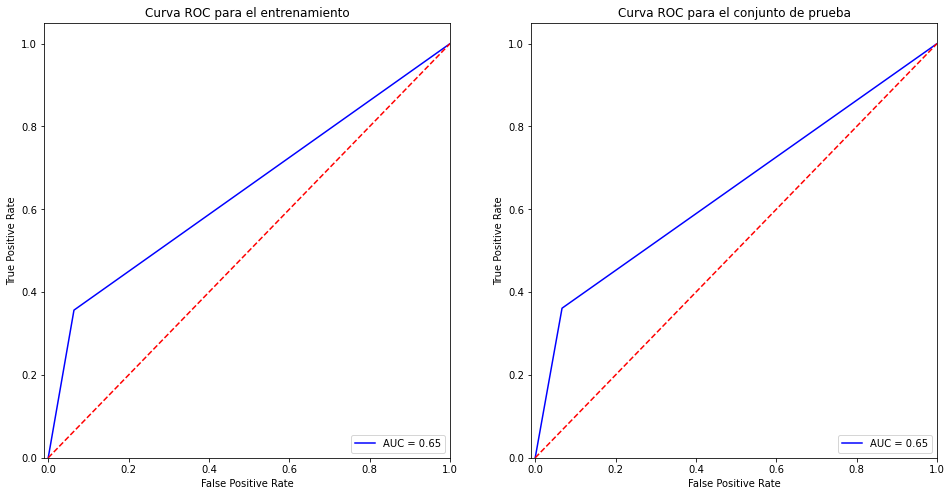

In [31]:
LDA_AUC_Train, LDA_AUC_Test, errorLDA, model  = error_clasificacion(XTrain=XTrain_transform,yTrain=yTrain,XTest=XTest_transform,yTest=yTest,modelo="LDA")

El error de clasificación para LDA en la muestra de test es:0.1960416666666695
[[3508  204]
 [ 737  351]]
0.8039583333333333
0.6324324324324324


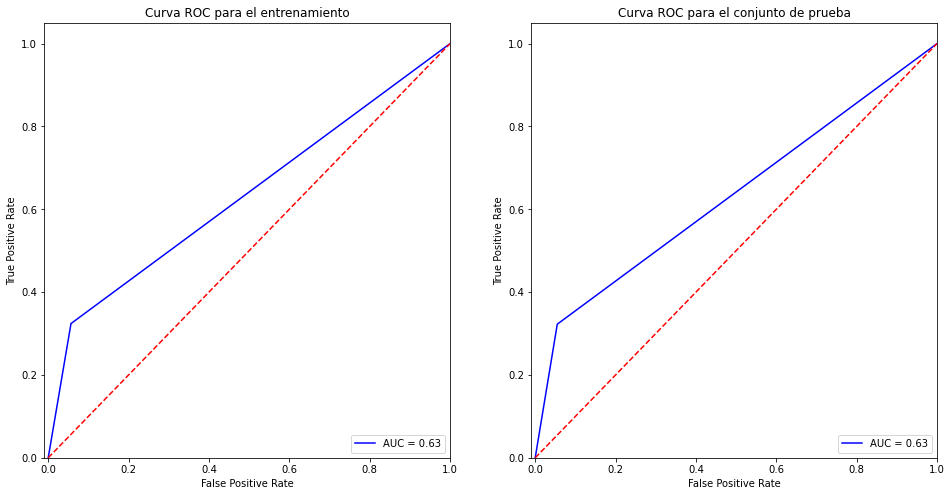

In [32]:
LDA_AUC_Train, LDA_AUC_Test, errorLDA, model  = error_clasificacion(XTrain=XTrain_transform_envoltura,yTrain=yTrain,XTest=XTest_transform_envoltura,yTest=yTest,modelo="LDA")

C:\Users\paulg\AppData\Local\Temp\ipykernel_34332\568190009.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ejeX, rotation = 90)


[Text(0, 0, 'PAY_1'),
 Text(1, 0, 'PAY_2'),
 Text(2, 0, 'PAY_3'),
 Text(3, 0, 'PAY_4'),
 Text(4, 0, 'PAY_5'),
 Text(5, 0, 'POS_BILL_AMT1'),
 Text(6, 0, 'DEFAULT_ON_1'),
 Text(7, 0, 'DEFAULT_ON_2'),
 Text(8, 0, 'DEFAULT_ON_3'),
 Text(9, 0, 'DEFAULT_ON_4'),
 Text(10, 0, 'DEFAULT_ON_5'),
 Text(11, 0, 'DEFAULT_ON_6'),
 Text(12, 0, 'PROPORTION_BILL_PAYED'),
 Text(13, 0, 'CONSECUTIVE_DEFAULTS'),
 Text(14, 0, 'TREND_BILL_AMT')]

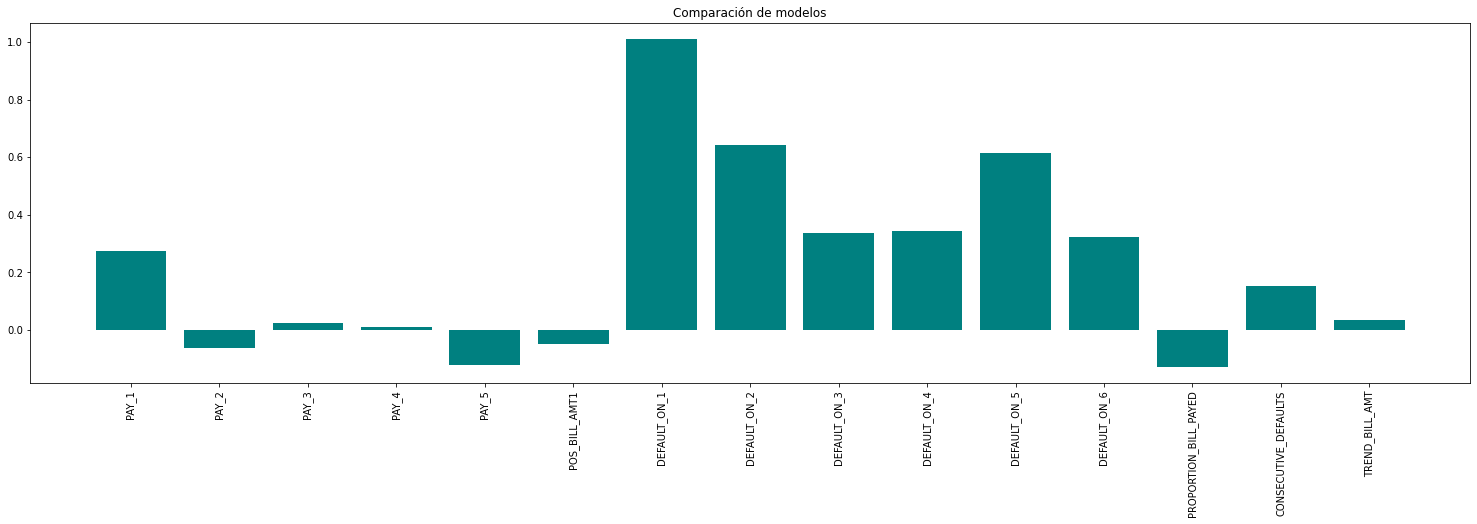

In [33]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")

ejeX = XTest_transform_envoltura.columns.values
ejeY = model.coef_[0]

ax.bar(ejeX,ejeY, color='teal')
ax.set_xticklabels(ejeX, rotation = 90)


# Random Forest

El error de clasificación para modelo en la muestra de test es:0.1879166666666693
[[3549  163]
 [ 739  349]]
accuracy : 0.8120833333333334
precision : 0.681640625


(0.8120833333333334, 0.681640625)

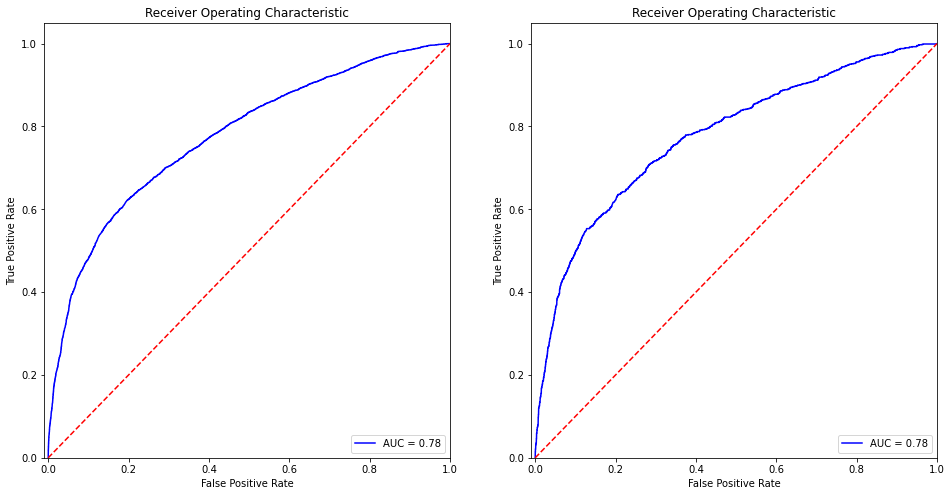

In [34]:
clfRF = RandomForestClassifier(random_state=0,max_depth = 4, n_estimators=200)
clfRF.fit(XTrain_transform, yTrain)

graficas_roc_test_train(XTrain_transform, yTrain, XTest_transform, yTest, clfRF)
metricas_modelo(XTest_transform, yTest, clfRF)

In [35]:
# clfRF = RandomForestClassifier(random_state=0,max_depth = 4, n_estimators=200)
# clfRF.fit(XTrain_transform_envoltura, yTrain)

# graficas_roc_test_train(XTrain_transform_envoltura, yTrain, XTest_transform_envoltura, yTest, clfRF)
# metricas_modelo(XTest_transform_envoltura, yTest, clfRF)

C:\Users\paulg\AppData\Local\Temp\ipykernel_34332\2217273997.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ejeX, rotation = 90)


[Text(0, 0, 'LIMIT_BAL'),
 Text(1, 0, 'AGE'),
 Text(2, 0, 'PAY_1'),
 Text(3, 0, 'PAY_2'),
 Text(4, 0, 'PAY_3'),
 Text(5, 0, 'PAY_4'),
 Text(6, 0, 'PAY_5'),
 Text(7, 0, 'PAY_6'),
 Text(8, 0, 'PAY_AMT1'),
 Text(9, 0, 'PAY_AMT2'),
 Text(10, 0, 'PAY_AMT3'),
 Text(11, 0, 'PAY_AMT4'),
 Text(12, 0, 'PAY_AMT5'),
 Text(13, 0, 'PAY_AMT6'),
 Text(14, 0, 'IS_REFUND1'),
 Text(15, 0, 'REFUND_AMT1'),
 Text(16, 0, 'POS_BILL_AMT1'),
 Text(17, 0, 'DEFAULT_ON_1'),
 Text(18, 0, 'IS_REFUND2'),
 Text(19, 0, 'REFUND_AMT2'),
 Text(20, 0, 'POS_BILL_AMT2'),
 Text(21, 0, 'DEFAULT_ON_2'),
 Text(22, 0, 'IS_REFUND3'),
 Text(23, 0, 'REFUND_AMT3'),
 Text(24, 0, 'POS_BILL_AMT3'),
 Text(25, 0, 'DEFAULT_ON_3'),
 Text(26, 0, 'IS_REFUND4'),
 Text(27, 0, 'REFUND_AMT4'),
 Text(28, 0, 'POS_BILL_AMT4'),
 Text(29, 0, 'DEFAULT_ON_4'),
 Text(30, 0, 'IS_REFUND5'),
 Text(31, 0, 'REFUND_AMT5'),
 Text(32, 0, 'POS_BILL_AMT5'),
 Text(33, 0, 'DEFAULT_ON_5'),
 Text(34, 0, 'IS_REFUND6'),
 Text(35, 0, 'REFUND_AMT6'),
 Text(36, 0, 'POS_BIL

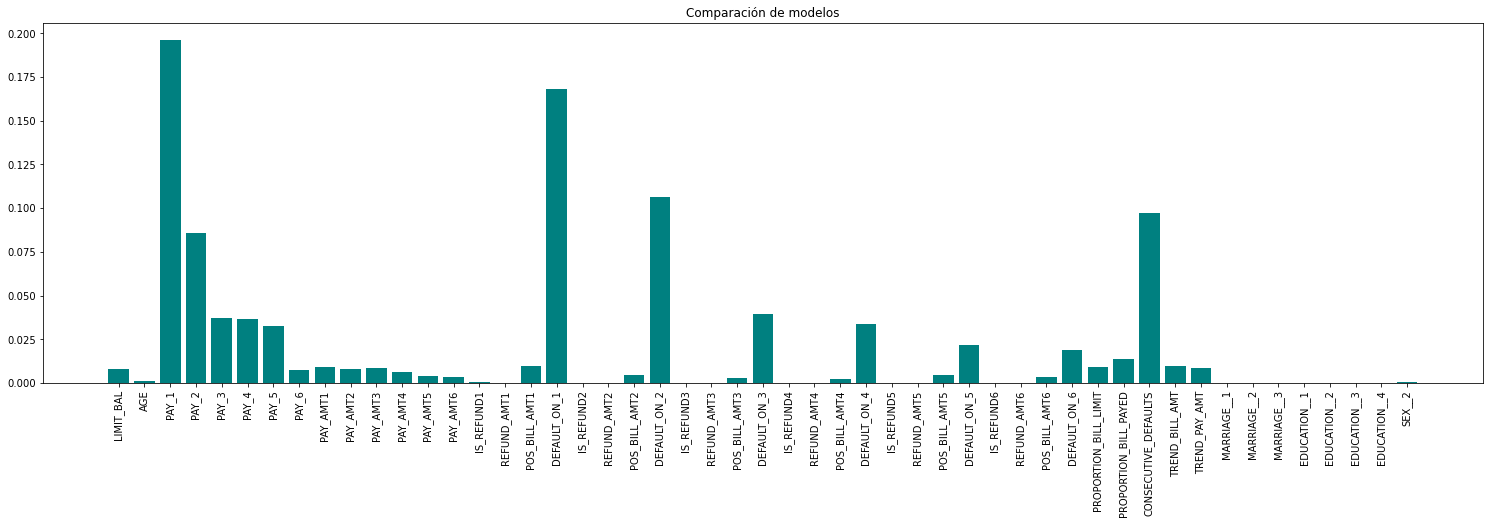

In [36]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")

ejeX = XTrain_transform.columns.values
ejeY = clfRF.feature_importances_

ax.bar(ejeX,ejeY, color='teal')
ax.set_xticklabels(ejeX, rotation = 90)

# Decission Tree

El error de clasificación para modelo en la muestra de test es:0.1818750000000025
[[3536  176]
 [ 697  391]]
accuracy : 0.818125
precision : 0.689594356261023


(0.818125, 0.689594356261023)

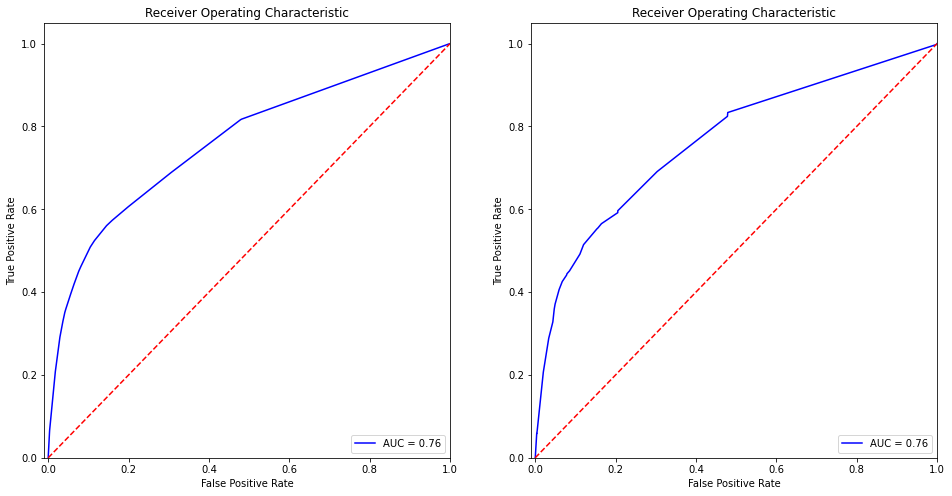

In [37]:
clfTree = DecisionTreeClassifier(max_depth=5)
clfTree.fit(XTrain_transform, yTrain)


graficas_roc_test_train(XTrain_transform, yTrain, XTest_transform, yTest, clfTree)
metricas_modelo(XTest_transform, yTest, clfTree)

C:\Users\paulg\AppData\Local\Temp\ipykernel_34332\1109755127.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ejeX, rotation = 90)


[Text(0, 0, 'LIMIT_BAL'),
 Text(1, 0, 'AGE'),
 Text(2, 0, 'PAY_1'),
 Text(3, 0, 'PAY_2'),
 Text(4, 0, 'PAY_3'),
 Text(5, 0, 'PAY_4'),
 Text(6, 0, 'PAY_5'),
 Text(7, 0, 'PAY_6'),
 Text(8, 0, 'PAY_AMT1'),
 Text(9, 0, 'PAY_AMT2'),
 Text(10, 0, 'PAY_AMT3'),
 Text(11, 0, 'PAY_AMT4'),
 Text(12, 0, 'PAY_AMT5'),
 Text(13, 0, 'PAY_AMT6'),
 Text(14, 0, 'IS_REFUND1'),
 Text(15, 0, 'REFUND_AMT1'),
 Text(16, 0, 'POS_BILL_AMT1'),
 Text(17, 0, 'DEFAULT_ON_1'),
 Text(18, 0, 'IS_REFUND2'),
 Text(19, 0, 'REFUND_AMT2'),
 Text(20, 0, 'POS_BILL_AMT2'),
 Text(21, 0, 'DEFAULT_ON_2'),
 Text(22, 0, 'IS_REFUND3'),
 Text(23, 0, 'REFUND_AMT3'),
 Text(24, 0, 'POS_BILL_AMT3'),
 Text(25, 0, 'DEFAULT_ON_3'),
 Text(26, 0, 'IS_REFUND4'),
 Text(27, 0, 'REFUND_AMT4'),
 Text(28, 0, 'POS_BILL_AMT4'),
 Text(29, 0, 'DEFAULT_ON_4'),
 Text(30, 0, 'IS_REFUND5'),
 Text(31, 0, 'REFUND_AMT5'),
 Text(32, 0, 'POS_BILL_AMT5'),
 Text(33, 0, 'DEFAULT_ON_5'),
 Text(34, 0, 'IS_REFUND6'),
 Text(35, 0, 'REFUND_AMT6'),
 Text(36, 0, 'POS_BIL

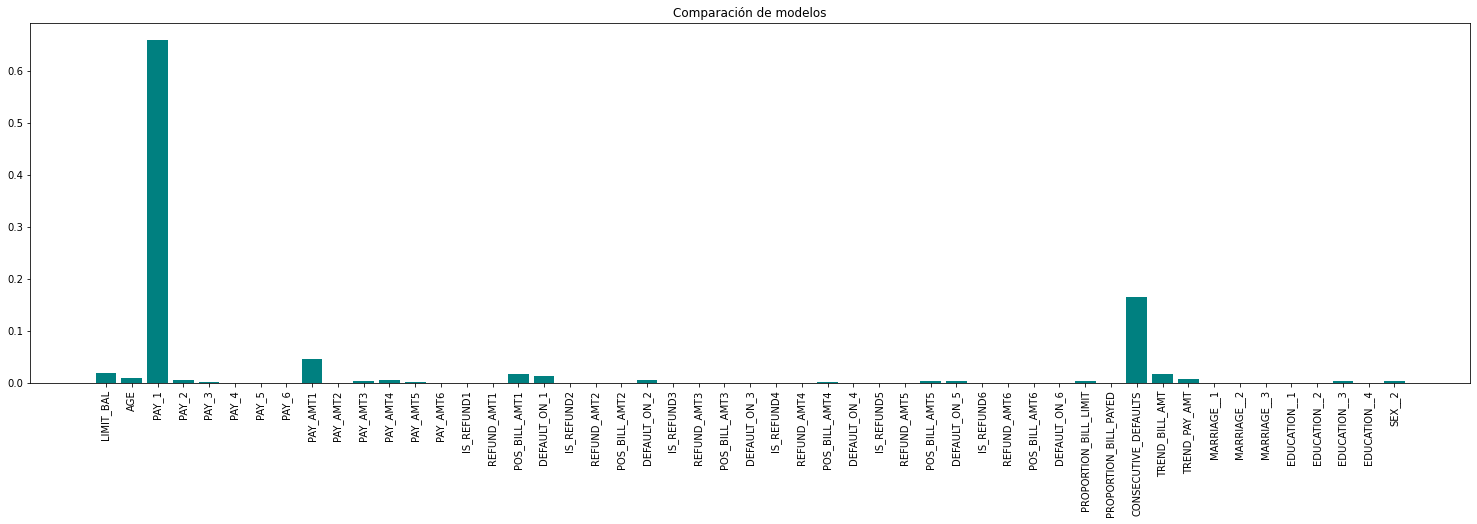

In [38]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")

ejeX = XTrain_transform.columns.values
ejeY = clfTree.feature_importances_

ax.bar(ejeX,ejeY, color='teal')
ax.set_xticklabels(ejeX, rotation = 90)

# Gradient Boosting

El error de clasificación para modelo en la muestra de test es:0.18687500000000262
[[3519  193]
 [ 704  384]]
accuracy : 0.813125
precision : 0.6655112651646448


(0.813125, 0.6655112651646448)

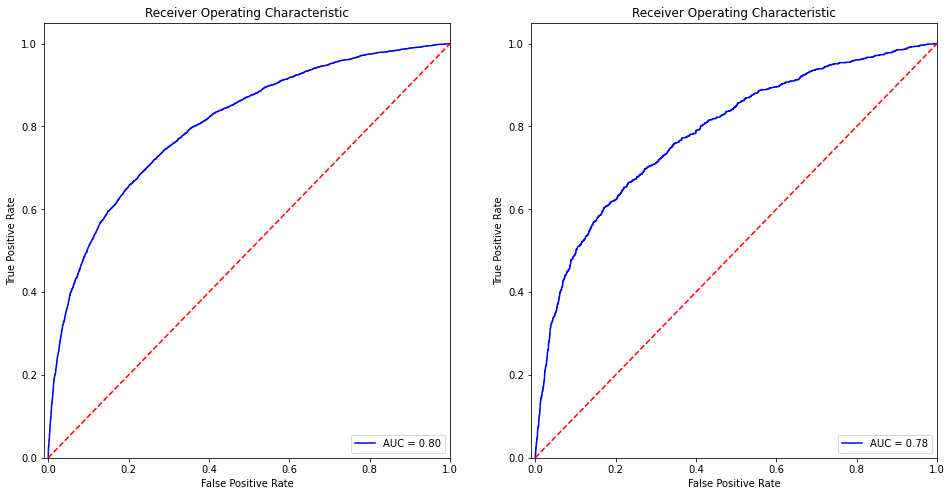

In [39]:
#clfGB= GradientBoostingClassifier(learning_rate=1.0,max_depth=1,random_state=0,n_estimators=200) # fue el enviado
clfGB= GradientBoostingClassifier(learning_rate=1.0,max_depth=1,random_state=0,n_estimators=200)
clfGB.fit(XTrain_transform, yTrain)

graficas_roc_test_train(XTrain_transform, yTrain, XTest_transform, yTest, clfGB)
metricas_modelo(XTest_transform, yTest, clfGB)

El error de clasificación para modelo en la muestra de test es:0.18250000000000252
[[3548  164]
 [ 712  376]]
accuracy : 0.8175
precision : 0.6962962962962963


(0.8175, 0.6962962962962963)

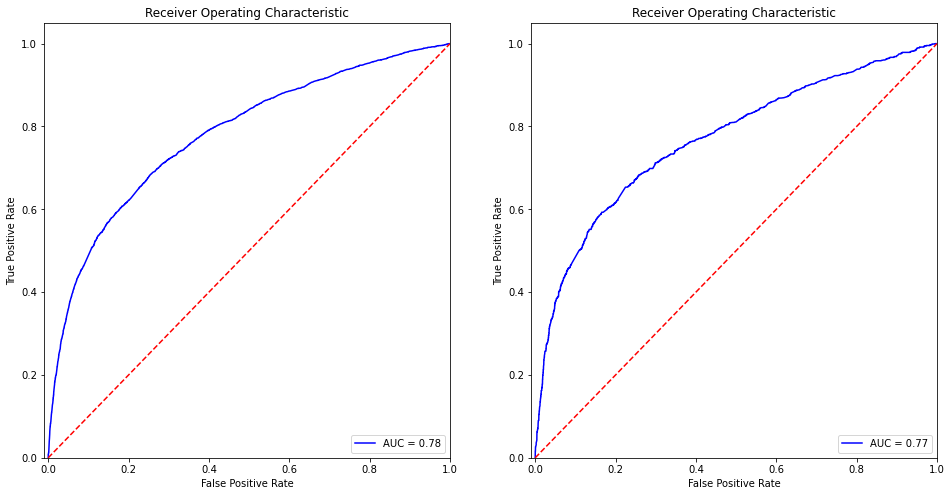

In [40]:
#clfGB= GradientBoostingClassifier(learning_rate=1.0,max_depth=1,random_state=0,n_estimators=200) # fue el enviado
clfGB= GradientBoostingClassifier(learning_rate=1.0,max_depth=1,random_state=0,n_estimators=200)
clfGB.fit(XTrain_transform_envoltura, yTrain)

graficas_roc_test_train(XTrain_transform_envoltura, yTrain, XTest_transform_envoltura, yTest, clfGB)
metricas_modelo(XTest_transform_envoltura, yTest, clfGB)

## Bagging

El error de clasificación para modelo en la muestra de test es:0.22312500000000346
[[3481  231]
 [ 840  248]]
accuracy : 0.776875
precision : 0.5177453027139874


(0.776875, 0.5177453027139874)

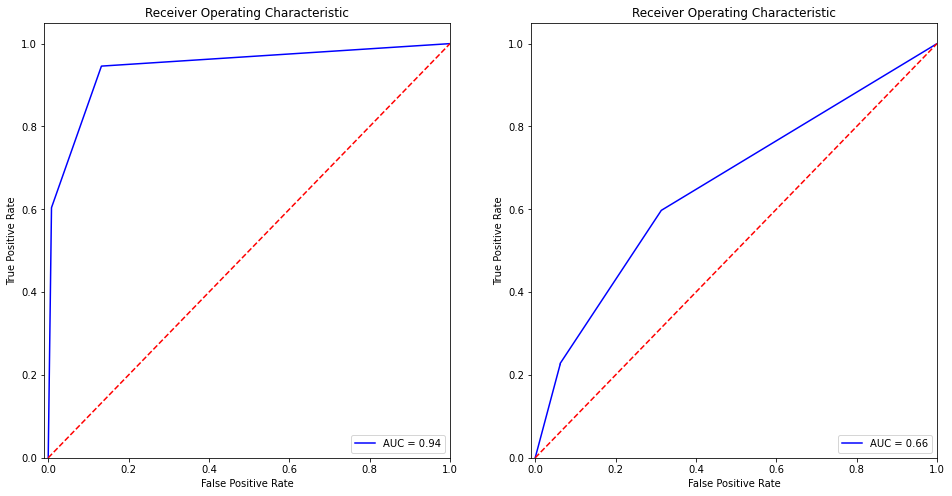

In [41]:
clfBag = BaggingClassifier(n_estimators=2, random_state=0)
clfBag.fit(XTrain_transform, yTrain)

graficas_roc_test_train(XTrain_transform, yTrain, XTest_transform, yTest, clfBag)
metricas_modelo( XTest_transform, yTest, clfBag)

El error de clasificación para modelo en la muestra de test es:0.21750000000000333
[[3505  207]
 [ 837  251]]
accuracy : 0.7825
precision : 0.5480349344978166


(0.7825, 0.5480349344978166)

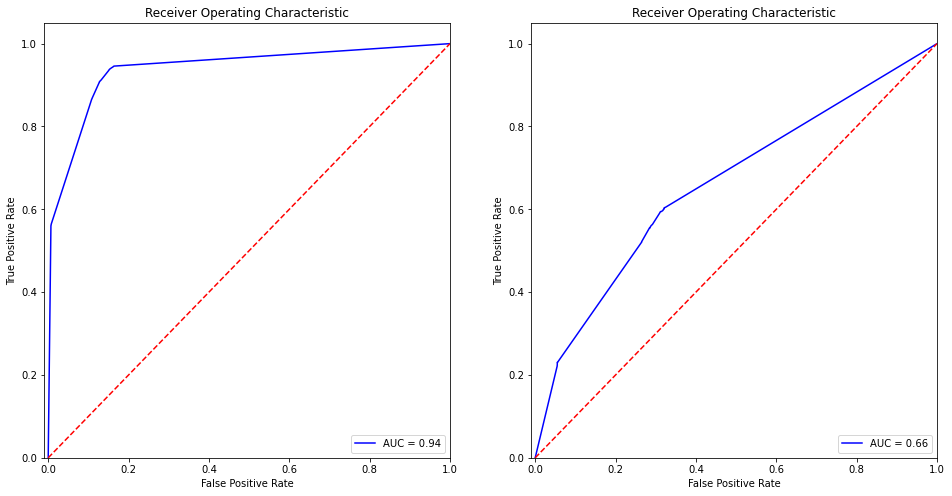

In [42]:
clfBag = BaggingClassifier(n_estimators=2, random_state=0)
clfBag.fit(XTrain_transform_envoltura, yTrain)

graficas_roc_test_train(XTrain_transform_envoltura, yTrain, XTest_transform_envoltura, yTest, clfBag)
metricas_modelo( XTest_transform_envoltura, yTest, clfBag)

# Logistic GAM

In [43]:

texto = ""
for i in np.arange(0,len(XTrain_transform.columns)):
    texto += "+ s({i})".format(i=i)

texto

'+ s(0)+ s(1)+ s(2)+ s(3)+ s(4)+ s(5)+ s(6)+ s(7)+ s(8)+ s(9)+ s(10)+ s(11)+ s(12)+ s(13)+ s(14)+ s(15)+ s(16)+ s(17)+ s(18)+ s(19)+ s(20)+ s(21)+ s(22)+ s(23)+ s(24)+ s(25)+ s(26)+ s(27)+ s(28)+ s(29)+ s(30)+ s(31)+ s(32)+ s(33)+ s(34)+ s(35)+ s(36)+ s(37)+ s(38)+ s(39)+ s(40)+ s(41)+ s(42)+ s(43)+ s(44)+ s(45)+ s(46)+ s(47)+ s(48)+ s(49)+ s(50)'

In [44]:
from pygam import LogisticGAM, s, f

gam = LogisticGAM(terms=s(0)+ s(1)+ s(2)+ s(3)+ s(4)+ s(5)+ s(6)+ s(7)+ s(8)+ s(9)+ s(10)+ s(11)+ s(12)+ s(13)+ s(14)+ s(15)+ s(16)+ s(17)+ s(18)+ s(19)+ s(20)+ s(21)+ s(22)+ s(23)+ s(24)+ s(25)+ s(26)+ s(27)+ s(28)+ s(29)+ s(30)+ s(31)+ s(32)+ s(33)+ s(34)+ s(35)+ s(36)+ s(37)+ s(38)).fit(XTrain_transform, yTrain)

Text(0.5, 0, 'False Positive Rate')

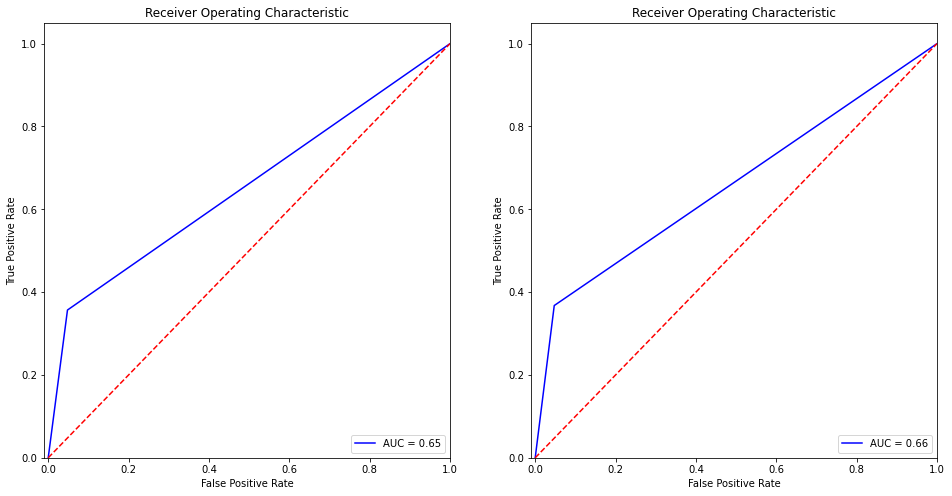

In [45]:
pred=gam.predict(X=XTest_transform)  #Predicción en test


fig, ax = plt.subplots(ncols=2, figsize=(16, 8))

# Train
prediccionGAM = gam.predict(X=XTrain_transform)
fpr, tpr, thresholds = metrics.roc_curve(yTrain, prediccionGAM, pos_label=1)
AUCRF=metrics.auc(fpr, tpr)
ax[0].set_title('Receiver Operating Characteristic')
ax[0].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCRF)
ax[0].legend(loc = 'lower right')
ax[0].plot([0, 1], [0, 1],'r--')
ax[0].axis(xmin=-0.01,xmax=1,ymin=0,ymax=1.05)
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')

# TEST
prediccionGAM = gam.predict(X=XTest_transform)
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionGAM, pos_label=1)
AUCRF=metrics.auc(fpr, tpr)
ax[1].set_title('Receiver Operating Characteristic')
ax[1].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCRF)
ax[1].legend(loc = 'lower right')
ax[1].plot([0, 1], [0, 1],'r--')
ax[1].axis(xmin=-0.01,xmax=1,ymin=0,ymax=1.05)
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')

## Promedio gradiente random forest

In [46]:
clfGB= GradientBoostingClassifier(learning_rate=1.0,max_depth=1,random_state=0,n_estimators=200)
clfGB.fit(XTrain_transform, yTrain)


clfRF = RandomForestClassifier(random_state=0,max_depth = 4, n_estimators=200)
clfRF.fit(XTrain_transform, yTrain)

prediccion_train_GB = clfGB.predict_proba(X=XTrain_transform)[:,1]
prediccion_train_RF = clfRF.predict_proba(X=XTrain_transform)[:,1]

prediccion_train = pd.DataFrame([prediccion_train_GB,prediccion_train_RF]).T.mean(axis=1)


prediccion_test_GB = clfGB.predict_proba(X=XTest_transform)[:,1]
prediccion_test_RF = clfRF.predict_proba(X=XTest_transform)[:,1]

prediccion_test = pd.DataFrame([prediccion_test_GB,prediccion_test_RF]).T.mean(axis=1)

In [52]:
metricas_modelo(XTest_transform, yTest, clfRF)
metricas_modelo(XTest_transform, yTest, clfGB)

El error de clasificación para modelo en la muestra de test es:0.1879166666666693
[[3549  163]
 [ 739  349]]
accuracy : 0.8120833333333334
precision : 0.681640625
El error de clasificación para modelo en la muestra de test es:0.18687500000000262
[[3519  193]
 [ 704  384]]
accuracy : 0.813125
precision : 0.6655112651646448


(0.813125, 0.6655112651646448)

(0.7759240125666107, 0.7776504114239985)

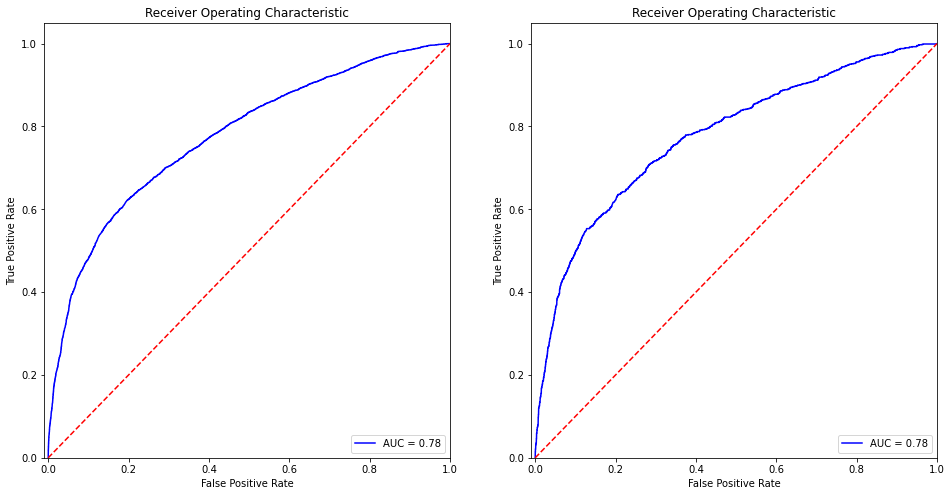

In [54]:
graficas_roc_test_train(XTrain_transform,yTrain, XTest_transform, yTest, clfRF)

(0.8043758343003206, 0.7843109192761156)

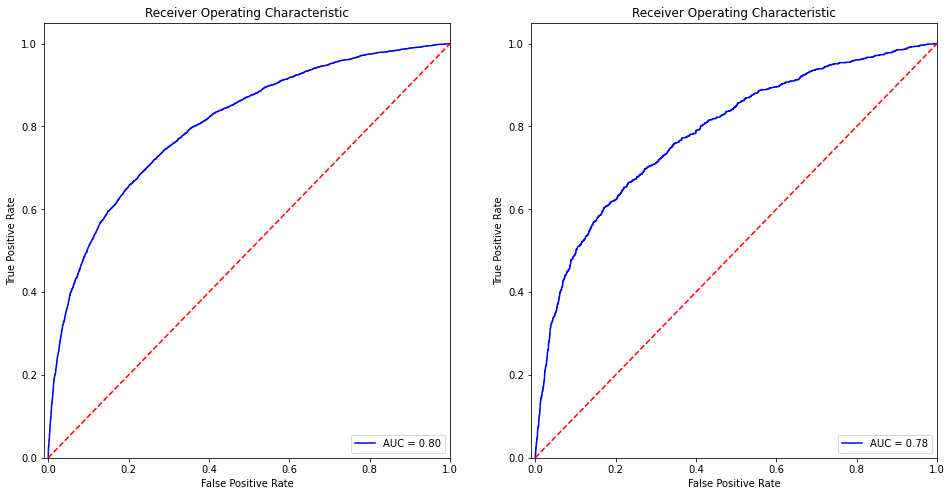

In [53]:
graficas_roc_test_train(XTrain_transform,yTrain, XTest_transform, yTest, clfGB)

# Submission

In [55]:
submission_df = pd.read_excel("data/Test.xlsx")
submission_df = submission_df.rename(columns={"default.payment.next.month":"default", "PAY_0":"PAY_1"})

Xsubmission = transform_x(submission_df)
# Xsubmission = Xsubmission.drop(columns=["PAY_AMT{i}".format(i=x) for x in np.arange(2,7)])
# Xsubmission = Xsubmission.drop(columns=["PAY_{i}".format(i=x) for x in np.arange(1,7)])


prediccion_submission = clfRF.predict_proba(Xsubmission)[:,1]


In [ ]:
model.classes_

In [56]:
pd.DataFrame()
export_df = Xsubmission
export_df["Probability"] = prediccion_submission

export_df = export_df["Probability"].reset_index()
export_df.columns = ["Id","Probability"]
export_df["Id"] = export_df["Id"]+1

export_df.to_csv("data/submission.csv",index=False)